In [1]:
import tensorflow as tf
print("Done importing , ",tf.__version__)

Done importing ,  2.0.0-alpha0


In [3]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [5]:
print('x_train shape : ',x_train.shape)
print('y_train shape : ',y_train.shape)
print('x_test shape : ',x_test.shape)
print('y_test shape : ',y_test.shape)

x_train shape :  (60000, 28, 28)
y_train shape :  (60000,)
x_test shape :  (10000, 28, 28)
y_test shape :  (10000,)


In [6]:
import matplotlib.pyplot as plt

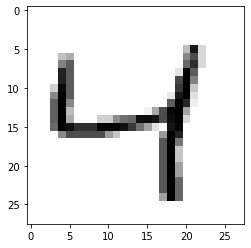

In [7]:
plt.imshow(x_train[2],cmap='binary')  #example image from dataset

In [8]:
y_train[2]      #label to the corresponding image

4

In [9]:
from tensorflow.keras.utils import to_categorical

y_train_encoded=to_categorical(y_train)
y_test_encoded=to_categorical(y_test)

In [10]:
print(y_train_encoded.shape)
print(y_test_encoded.shape)

(60000, 10)
(10000, 10)


In [11]:
import numpy as np
x_train_reshaped=np.reshape(x_train,(60000,784))
x_test_reshaped=np.reshape(x_test,(10000,784))
print(x_train_reshaped.shape)
print(x_test_reshaped.shape)

(60000, 784)
(10000, 784)


In [12]:
print(set(x_train_reshaped[2]))

{0, 2, 5, 137, 14, 143, 16, 144, 150, 23, 153, 27, 28, 29, 159, 162, 163, 39, 40, 169, 46, 47, 49, 178, 179, 180, 177, 183, 56, 57, 62, 67, 198, 207, 81, 210, 85, 86, 216, 91, 220, 222, 94, 248, 96, 98, 102, 231, 232, 233, 234, 250, 237, 240, 241, 243, 116, 245, 119, 120, 253, 126, 252, 125, 254, 255}


In [13]:
x_mean=np.mean(x_train_reshaped)
x_std=np.std(x_train_reshaped)
epsilon= 1e-10
x_train_norm=(x_train_reshaped - x_mean)/ (x_std + epsilon)
x_test_norm=(x_test_reshaped - x_mean)/ (x_std + epsilon)

In [14]:
print(set(x_train_norm[2]))

{-0.4240738943910262, 0.36505657182371787, 2.5288013985415647, 0.4286961255507134, 0.6068868759863008, 1.1032753950568654, 1.8669500397808114, 1.17964285952926, 1.6505755571090268, 1.5232964496550359, 2.2487873621427843, 2.3760664695967755, 2.4015222910875735, 2.694264238231753, 2.096052433197995, 2.73244797046795, 2.668808416740955, 0.772349715676489, 1.396017342201045, 0.8232613586580854, 0.7978055371672873, 1.166914948783861, 1.4851127174188385, 1.8287663075446141, 0.1995937321335296, 2.8088154349403447, 2.7833596134495466, 2.7960875241949457, 2.7579037919587486, 2.8215433456857437, 0.8741730016396818, 1.0905474843114664, 1.8414942182900134, 1.8542221290354124, -0.39861807290022805, 0.07231462467953861, -0.08042030426525057, 0.16140999989733232, -0.13133194724684696, -0.22042732246464067, -0.05496448277445237, 1.9051337720170087, 0.1741379106427314, 1.7269430215814214, 2.5160734877961657, 2.5542572200323628, 0.2886891073513233, 2.210603629906587, -0.36043434066403074, 2.541529309286

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu' , input_shape=(784,)),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')    
])

In [16]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(x_train_norm,y_train_encoded,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 12s 199us/sample - loss: 0.9528 - accuracy: 0.7333
Epoch 2/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.4284 - accuracy: 0.8802
Epoch 3/10
60000/60000 [==============================] - 9s 142us/sample - loss: 0.3407 - accuracy: 0.9030
Epoch 4/10
60000/60000 [==============================] - 11s 181us/sample - loss: 0.2985 - accuracy: 0.9140
Epoch 5/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.2712 - accuracy: 0.9227
Epoch 6/10
60000/60000 [==============================] - 9s 152us/sample - loss: 0.2513 - accuracy: 0.9279
Epoch 7/10
60000/60000 [==============================] - 10s 164us/sample - loss: 0.2357 - accuracy: 0.9322
Epoch 8/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.2227 - accuracy: 0.9366
Epoch 9/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2118 - accuracy: 0.9394
Epoch 10/10
60000/60000 [

In [18]:
loss,accuracy= model.evaluate(x_test_norm,y_test_encoded)
print('Train set accuracy : ',accuracy*100)

10000/10000 [==============================] - 1s 136us/sample - loss: 0.1963 - accuracy: 0.9430
Train set accuracy :  94.30000185966492


In [19]:
preds = model.predict(x_test_norm)
print(preds.shape)

(10000, 10)


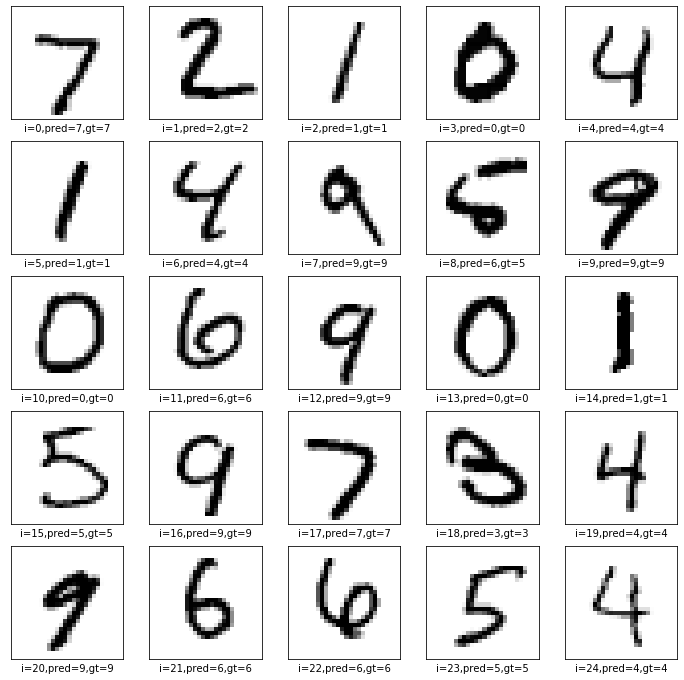

In [26]:
plt.figure(figsize=(12,12))
start_index=0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred=np.argmax(preds[start_index+i])
    gt=y_test[start_index+i]
    col='green'
    if pred != gt:
        col='red'
    plt.xlabel('i={},pred={},gt={}'.format(start_index+i,pred,gt))
    plt.imshow(x_test[start_index+i],cmap='binary')
plt.show()

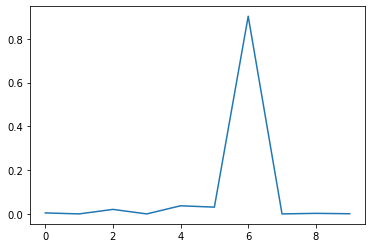

In [25]:
plt.plot(preds[8])   #8th image is not predicted correct (image is of 5 and it predicted 6)
plt.show()